### **Predicción de cancer de mama utilizando deep learning**

Se realiza el analisis de un dataset que contiene información sobre cancer de mama. En el dataset se cuenta con las características que se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (PAAF) de una masa mamaria. Asi, los datos describen características de los núcleos celulares presentes en la imagen.

El dataset se encuentra disponible en Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### **1. Importación de librerias y dataset**

Se importan las librerias a ser utilizadas y el dataset a analizar

In [1]:
# basicas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.losses import BinaryCrossentropy
# cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import roc_curve, auc
# reduccion 
from sklearn.decomposition import PCA
# deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from keras.layers import Input, Dense

In [2]:
# importar 
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **2. Exploración de los datos**

En esta sección se realiza una exploración de los datos. Se busca identificar los tipos de datos presentes y también detectar la presencia de valores nulos, con el objetivo de elegir una técnica de imputación adecuada en caso de ser necesaria.

### **2.1. Verificacion de tipo de datos**

In [3]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Los datos del dataset son mayoritariamente numéricos. Solamente la variable diagnosis es del tipo object.

Con el objetivo de conocer mejor los datos, se filtran en particular los datos del tipo int y del tipo object.

In [4]:
# filtrar columnas de tipo int y object
filtered_df = df.select_dtypes(include=['int', 'object'])

# valores unicos de cada columna
unique_values = {col: filtered_df[col].unique() for col in filtered_df.columns}

# resultado
for col, values in unique_values.items():
    print(f"Columna: {col}")
    print(f"Valores únicos: {values}\n")

Columna: id
Valores únicos: [   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     8620

Se logra identificar que, los valores reconcidos como int corresponden a la variable denominada "id" que vendria a ser como un identificador del paciente. Por otro lado, la variable diagnosis es una variable con comportamiento binario, M, si el tumor es maligno y B, si el tumor es benigno.

### **2.2. Identificación de valores faltantes**

Se verifica la cantidad y porcentaje de valores faltantes en el dataframe, además de ser necesario se rellenan los datos faltantes.

In [5]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# filtrar solo los que tienen NA
na = na[na['Na en q'] > 0]

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Unnamed: 32,0,569,100.0


Con esta verificación, se observa que hay una columna con datos vacios.

In [6]:
# unicos
df['Unnamed: 32'].unique()

array([nan])

Como esa columna no contiene datos, se eliminara del dataset

In [7]:
# eliminar
df = df.drop(columns=['Unnamed: 32'])

In [8]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)

# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)

# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)

# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)

# filtrar solo los que tienen NA
na = na[na['Na en q'] > 0]

# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %


El dataset quedo sin datos faltantes.

### **2.3. Verificacion de valores duplicados**

Se procede a verificar si hay datos duplicados en el dataset.

In [9]:
# identificar duplicados
duplicados = df.duplicated()

# contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


El dataset no contiene datos duplicados.

### **2.4. Análisis exploratorio**

En esta sección, se busca revisar con detenimiento las columnas del dataset y así lograr identificar aquellas relacionadas con datos sensoriales. Recordemos que, las variables relacionadas con datos sensoriales incluyen las mediciones hechas con el acelerometro y giroscopio del smartphone.

In [10]:
# columnas del df
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# describe
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### **3. Aplicacion de modelo**

Inicialmente se realiza un escalamiento de los datos para que se encuentren todos en una misma escala.

In [12]:
# df
df.head(5).T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


Se mapea la variable diagnosis para que solo tome valores numericos, es decir, 1 para el caso de que sea M y 0 si es B.

In [13]:
# convertir la variable diagnosis a binario
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [14]:
# unicos
df['diagnosis'].unique()

array([1, 0], dtype=int64)

Se elige como variable target a "diagnosis", dejando a las demas variables como predictoras, a excepcion del id ya que esta variable es solo un identificador de paciente.

In [15]:
# variable target y predictora
x = df.drop(columns=['diagnosis','id'])
y = df['diagnosis']

In [16]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Se aplican los escalamientos para ambos set de datos.

In [17]:
# escaler
scaler = StandardScaler()

# se escalan los datos 
# fit transform para train
x_train_scaled = scaler.fit_transform(x_train)

# transform para test
x_test_scaled = scaler.transform(x_test)

Como no se dispone de variables categoricas, no se agrega un encoder.

Una vez preprocesado los datos, se crea el modelo MLP. Se utiliza input, especificando la forma de los datos de entrada. La primera capa oculta cuenta con 128 neuronas, ya que el dataset contiene mas de 500 datos de entrada, ademas se opta por la funcion de activación ReLu, por ser más eficiente computacionalmente. En la segunda capa oculta se reduce a 64 neuronas y nuevamente se aplica la función ReLu. La capa de salida devuelve el número de clases del problema, es decir, 6 clases. Como el problema es del tipo multiclase, se opta por la funcion softmax, que convierte las salidas en probabilidades  

In [18]:
# modelo MLP
model_mlp = Sequential([
    # entrada y capa oculta
    Input(shape=(x_train.shape[1],)),  
    Dense(32, activation='relu'),  
    # capa salida
    Dense(1, activation='sigmoid')  
])

In [19]:
# resumen del modelo
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

A continuacion se compila el modelo. Considerando la eficiencia se opto por Adam, que es un algoritmo que ajusta los pesos del modelo durante el entrenamiento con el objetivo de minimizar la funcion de perdida. Para la funcion de pérdida se optó por binary_crossentropy, que suele ser utilizado en problemas de clasificación binaria. Por último, la métrica seleccionada fue la de accuracy.

In [20]:
# compilar
model_mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
) 

A continuacion se entrena el modelo. Se utilizaran 50 epocas, que serian 50 veces en las cuales el modelo recorreria todo el conjunto de datos. El valor de batch_size será de 32 y los datos de validación serán los datos del conjunto de test.

In [21]:
# entrenar el modelo
history = model_mlp.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6884 - loss: 17.1252 - val_accuracy: 0.6901 - val_loss: 1.7965
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6306 - loss: 2.8951 - val_accuracy: 0.8772 - val_loss: 0.6792
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8833 - loss: 1.6773 - val_accuracy: 0.9181 - val_loss: 0.6969
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8758 - loss: 1.2819 - val_accuracy: 0.8655 - val_loss: 0.6863
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8155 - loss: 1.4105 - val_accuracy: 0.8830 - val_loss: 0.6013
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8675 - loss: 1.2599 - val_accuracy: 0.9064 - val_loss: 0.5692
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8267 - loss: 1.5041 - val_accuracy: 0.8655 - val_loss: 0.5981
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8311 - loss: 1.3954 - val_accuracy: 0.9006 - val_los

Se evalua el rendimiento del modelo en el conjunto de test.

In [22]:
# evaluar 
test_loss, test_accuracy = model_mlp.evaluate(x_test_scaled, y_test, verbose=0)

# resultado
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Loss: 0.5862
Test Accuracy: 72.51%


Se obtuvo alrededor de 72% de exactitud en el dataset. A continuación se realizan predicciones.

In [23]:
# hacer predicciones
y_pred_train = model_mlp.predict(x_train_scaled)
y_pred_test = model_mlp.predict(x_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Es importante tener en cuenta que cuando al utilizar una capa de salida con activación sigmoide, las predicciones serán valores continuos entre 0 y 1, no valores binarios (0 o 1). Por lo tanto, para clasificar las predicciones como 0 o 1, se debe aplicar un umbral, generalmente 0.5, para convertir las probabilidades en etiquetas binarias.

In [24]:
# pbb en binario
y_pred_train_bin = (y_pred_train > 0.5).astype(int)
y_pred_test_bin = (y_pred_test > 0.5).astype(int)

# resultados
print("Ejemplo de predicciones en entrenamiento:")
print(y_pred_train_bin[:5].flatten())

print("Ejemplo de predicciones en prueba:")
print(y_pred_test_bin[:5].flatten())

Ejemplo de predicciones en entrenamiento:
[0 1 1 0 0]
Ejemplo de predicciones en prueba:
[0 0 0 1 1]


In [25]:
# matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_test_bin)
print('Matriz de Confusión:')
print(conf_matrix)

Matriz de Confusión:
[[83 25]
 [22 41]]


In [26]:
# funcion para graficar la matriz de confusion
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

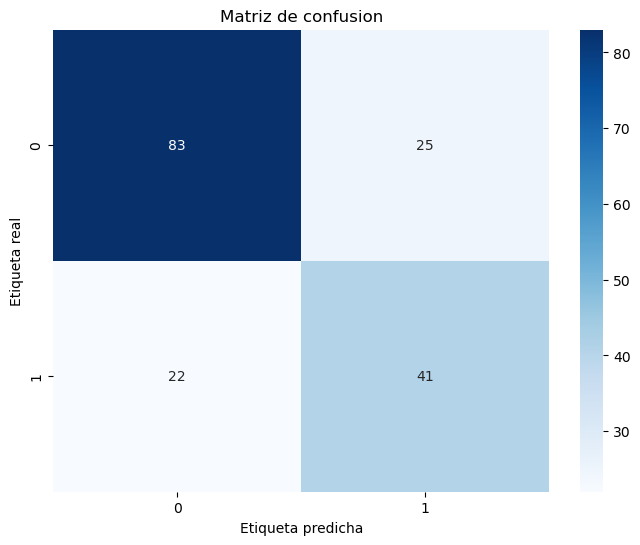

In [27]:
# extraer las clases
classes = np.sort(np.unique(y_test))

# graficar la matriz
plot_confusion_matrix(conf_matrix, classes, title="Matriz de confusion")

Con esta matriz de confusion, se puede observar que el modelo realiza las predicciones en la mayoria de los casos. Pero se observa que hay varias etiquetas que estan siendo mal predichas.

In [28]:
# precisión
accuracy = accuracy_score(y_test, y_pred_test_bin)
print(f'Exactitud: {accuracy:.2f}')

# informe
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred_test_bin, target_names=['Benigno (0)', 'Maligno (1)']))

Exactitud: 0.73
Informe de Clasificación:
              precision    recall  f1-score   support

 Benigno (0)       0.79      0.77      0.78       108
 Maligno (1)       0.62      0.65      0.64        63

    accuracy                           0.73       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.73      0.73      0.73       171



En general, el modelo realizó las predicciones, pero con un rendimiento bajo. 

A continuacion se grafica la curva roc.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


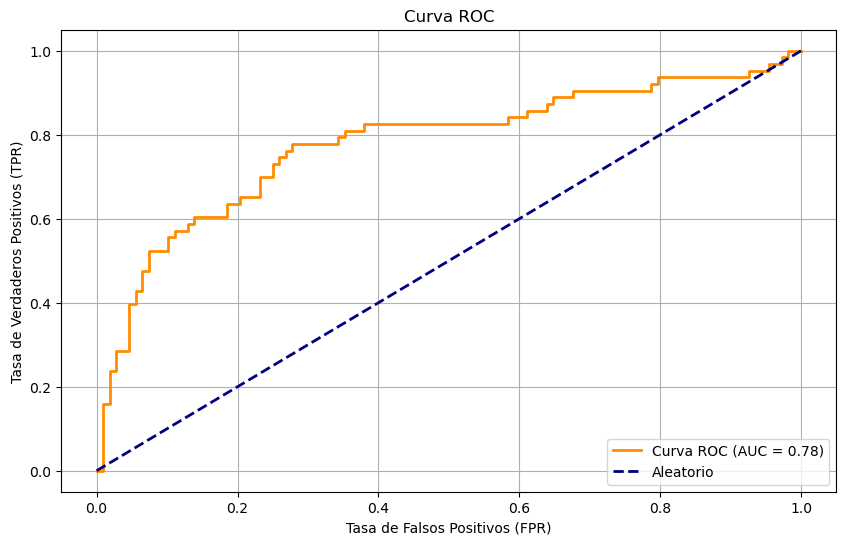

In [29]:
# pbb para 1 
y_pred_prob = model_mlp.predict(x_test_scaled).flatten()

# falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva roc
roc_auc = auc(fpr, tpr)

# graficar
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')

# Línea diagonal (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')

# configuraciones
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

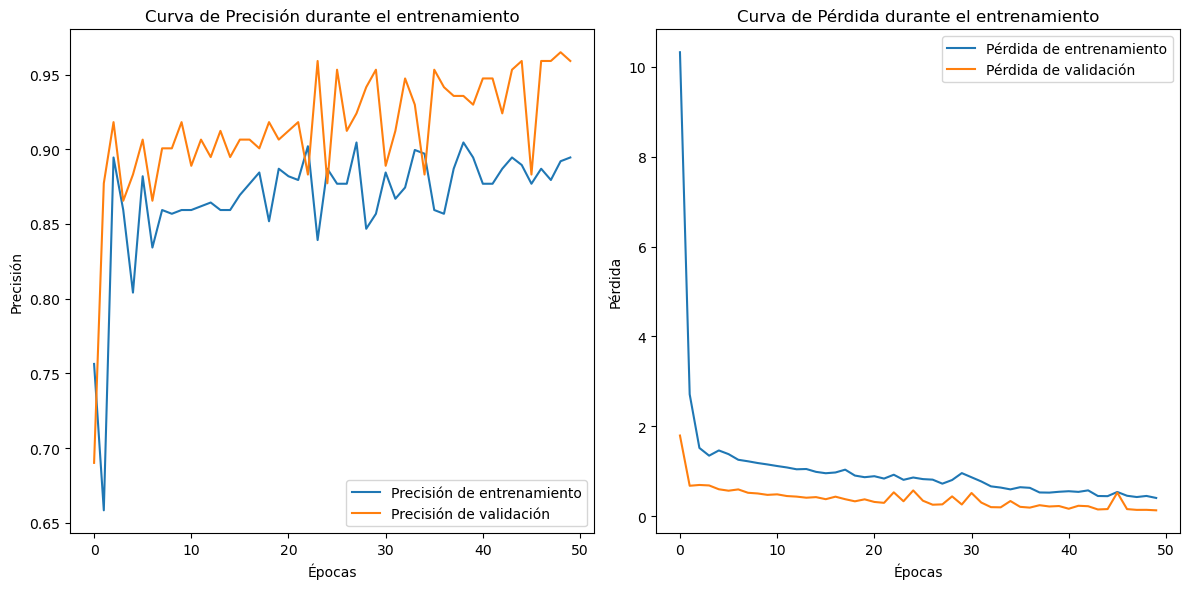

In [30]:
# Graficar la evolución de la precisión
plt.figure(figsize=(12, 6))

# Precisión en el conjunto de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la evolución de la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


El primer grafico muestra la curva de precisión durante el entrenamiento vs la curva de precisión de validación. Se observa que ambas curvas mejoran a medida que aumentan las epocas. Es importante destacar que la curva de precision tambien presenta fluctuaciones, al igual que la de entrenamiento, sin embargo, la curva de validacion tiene un comportamiento menos estable. 

El gráfico de la derecha muestra lo mismo pero para el caso de la pérdida durante el entrenamiento. Ambas curvas nuevamente muestran que las pérdidas van disminuyendo a medida que aumentan las épocas, ya que el modelo va reduciendo los errores. 

En general, se observa que a pesar de la rapida disminucion de los errores en el conjunto de entrenamiento, el modelo no mejora su rendimiento en el conjunto de test.  

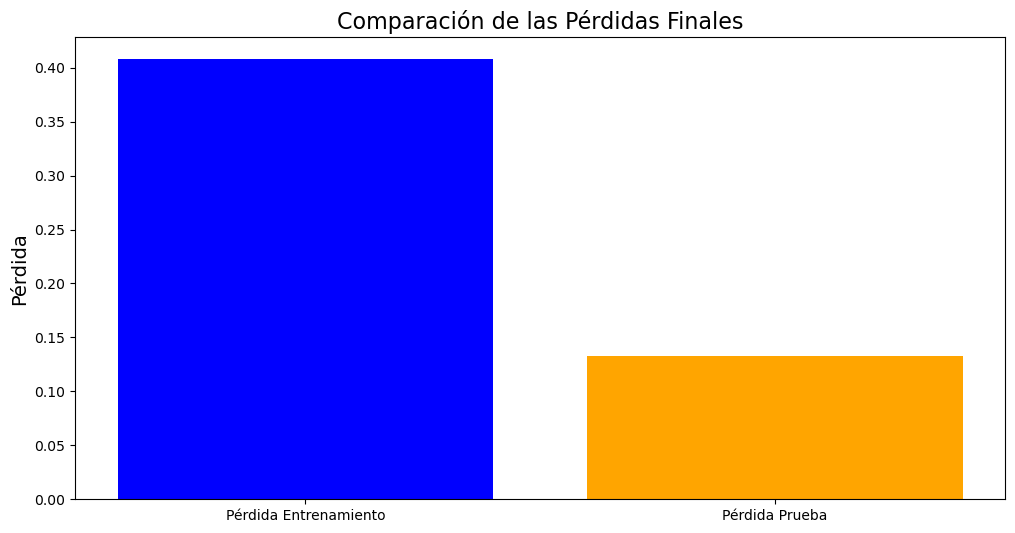

In [31]:
# comparación de pérdidas finales
plt.figure(figsize=(12, 6))
final_losses = [history.history['loss'][-1], history.history['val_loss'][-1]]
plt.bar(["Pérdida Entrenamiento", "Pérdida Prueba"], final_losses, color=["blue", "orange"])
plt.title("Comparación de las Pérdidas Finales", fontsize=16)
plt.ylabel("Pérdida", fontsize=14)
plt.show()

Se nota que el modelo tiene bastante perdida en el entrenamiento. 

Aparentemente, la red MLP es adecuada para este dataset, sin embargo, el modelo tiene un rendimiento bueno, mas no optimo. Se observan que las etiquetas son predichas de manera buena segun la matriz de confusion y segun el classification report, se tiene una exactitud de 73% en el dataset, por otro lado la curva roc arroja un valor de 0.78. En lineas generales el modelo tiene un desempeño aceptable, sin embargo es necesario aplicar mejoras ya que se observa que si bien el error disminuye con el aumento de las epocas. la perdida en el set de entrenamiento es muy grande, lo que puede ser señal de que los datos cuentan con mucho ruido, o que los datos se encuentran desbalanceados o overfitting.